<a href="https://colab.research.google.com/github/arthurnovello/ECM514-Ciencia_dos_Dados/blob/master/aula_06_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 06/04 - Iris Dataset

In [0]:
#Bibliotecas utilizadas para classificação e exportação da árvore gerada
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#Biblioteca para facilitar a separação dos dataset em dados de traino e teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
#Pandas é uma biblioteca que facilita a ingestão e manipulação de dados
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)


#enabling to plot using plotlib in the notebook
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
df = pd.read_csv(
    "/content/drive/My Drive/Colab Notebooks/ecm514_datasets/iris_data.txt")
df

,comprimento-sepala,largura-sepala,comprimento-petala,largura-petala,rotulo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
df[' rotulo'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
df[' rotulo'] = df[' rotulo'].map( {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 
                                    'Iris-virginica' : 2} )
df

,comprimento-sepala,largura-sepala,comprimento-petala,largura-petala,rotulo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [0]:
nomes_features = list(df.columns[:4])
nomes_features

['comprimento-sepala',
 ' largura-sepala',
 ' comprimento-petala',
 ' largura-petala']

In [0]:
x = df[  nomes_features ]
x.head()

,comprimento-sepala,largura-sepala,comprimento-petala,largura-petala
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
y = df[  df.columns[4] ]
y.head()

0    0
1    0
2    0
3    0
4    0
Name:  rotulo, dtype: int64

In [0]:
x_treino_dummy = x[:105]
x_teste_dummy = x[105:]

y_treino_dummy = y[:105]
y_teste_dummy = y[105:]

In [0]:
#classificador
classificador_dummy = DecisionTreeClassifier()
#treinando o modelo
classificador_dummy.fit( x_treino_dummy, y_treino_dummy )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
classificador_dummy.score(x_treino_dummy, y_treino_dummy)

1.0

In [0]:
classificador_dummy.score(x_teste_dummy, y_teste_dummy)

0.7333333333333333

In [0]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, 
                                                        random_state = 2556)
x_treino.head()

,comprimento-sepala,largura-sepala,comprimento-petala,largura-petala
39,5.1,3.4,1.5,0.2
16,5.4,3.9,1.3,0.4
13,4.3,3.0,1.1,0.1
110,6.5,3.2,5.1,2.0
67,5.8,2.7,4.1,1.0


In [0]:
#classificador
classificador = DecisionTreeClassifier()
#treinando o modelo
classificador.fit( x_treino, y_treino )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
classificador.score( x_treino, y_treino)

1.0

In [0]:
classificador.score(x_teste, y_teste)

0.9777777777777777

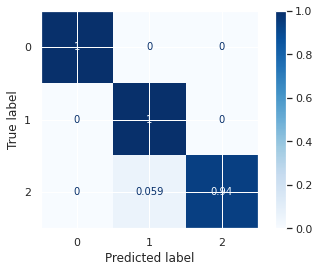

In [0]:
plot_confusion_matrix(estimator=classificador, X=x_teste, y_true=y_teste, 
                      display_labels=df[' rotulo'].unique(), cmap=plt.cm.Blues, 
                      normalize='true')

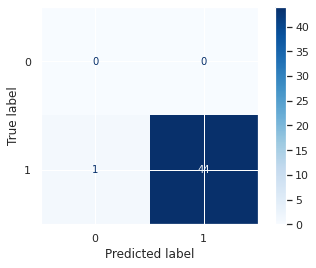

In [0]:
plot_confusion_matrix(estimator=classificador_dummy, X=x_teste_dummy, 
                      y_true=y_teste_dummy, 
                      display_labels=df[' rotulo'].unique(), cmap=plt.cm.Blues, 
                      normalize=None)

In [0]:
import graphviz
dot_graph = export_graphviz(classificador, out_file='/content/drive/My Drive/Colab Notebooks/iris.dot')
dot_graph = export_graphviz(classificador_dummy, out_file='/content/drive/My Drive/Colab Notebooks/irisdummy.dot')